In [45]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure 
import seaborn as sns

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of the plots

df = pd.read_csv(r'C:\Users\gusta\Downloads\peliculas.csv')


In [2]:
df.head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0


In [3]:
#Missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}: {}%'.format(col,pct_missing))

name: 0.0%
rating: 0.010041731872717789%
genre: 0.0%
year: 0.0%
released: 0.0002608242044861763%
score: 0.0003912363067292645%
votes: 0.0003912363067292645%
director: 0.0%
writer: 0.0003912363067292645%
star: 0.00013041210224308815%
country: 0.0003912363067292645%
budget: 0.2831246739697444%
gross: 0.02464788732394366%
company: 0.002217005738132499%
runtime: 0.0005216484089723526%


In [4]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [47]:
df.dropna(subset = ["budget","gross"], inplace=True)

df['budget']= df['budget'].astype('int64')
df['gross']= df['gross'].astype('int64')

df.head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0


In [48]:
#df['released'] = df['released'].str.rsplit(',')
df['released'] = df['released'].str.partition(',')[2]#[0:2]

In [49]:
df[['released']]
df['year_correct'] = df['released'].str[0:5]

In [14]:
df.tail(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
7666,It's Just Us,NaN,Drama,2020,2020 (United States),NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,2020
7667,Tee em el,NaN,Horror,2020,2020 (United States),5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0,2020


In [63]:
df.sort_values(by='gross',inplace=False, ascending = False).head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,2009 (United States),7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,2019 (United States),8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019


In [16]:
#To see the entire table
pd.set_option('display.max_rows',None)

In [64]:
#Drop duplicates, shows distinct values

df['company'].drop_duplicates().sort_values(ascending=False).head(2)

7129        thefyzz
5664    micro_scope
Name: company, dtype: object

In [33]:
#Correlations (pearson-default, kendall, spearman)
df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


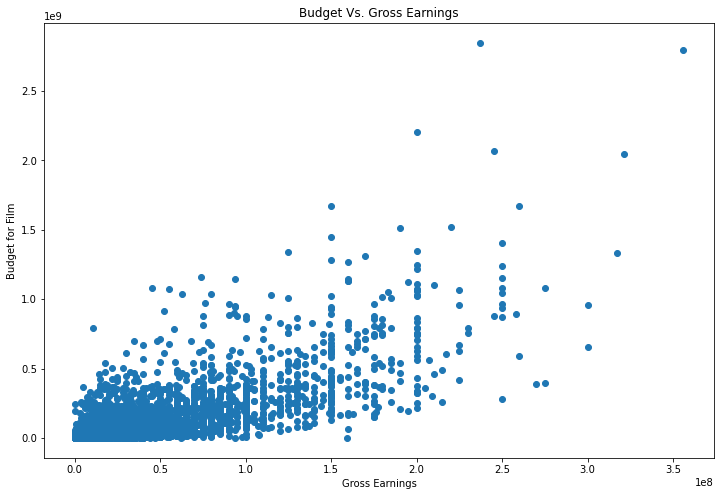

In [23]:
#Scatter plot (budget vs gross)

plt.scatter(x=df['budget'],y=df['gross'])

plt.title('Budget Vs. Gross Earnings')

plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

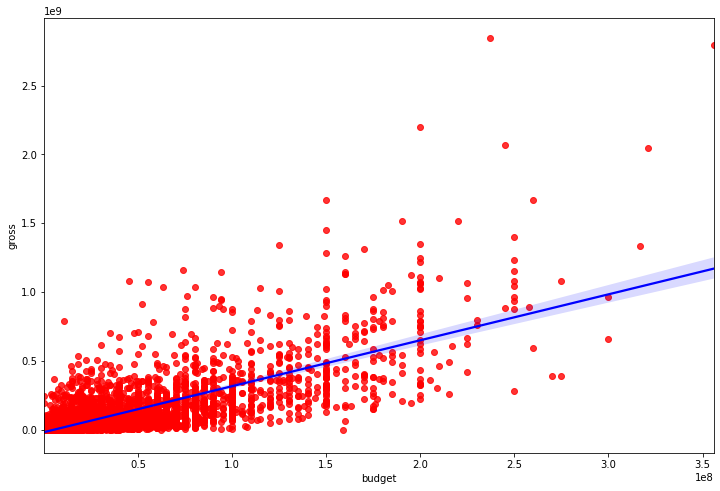

In [27]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget',y='gross',data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})


In [34]:
correlation_matrix = df.corr(method='pearson')

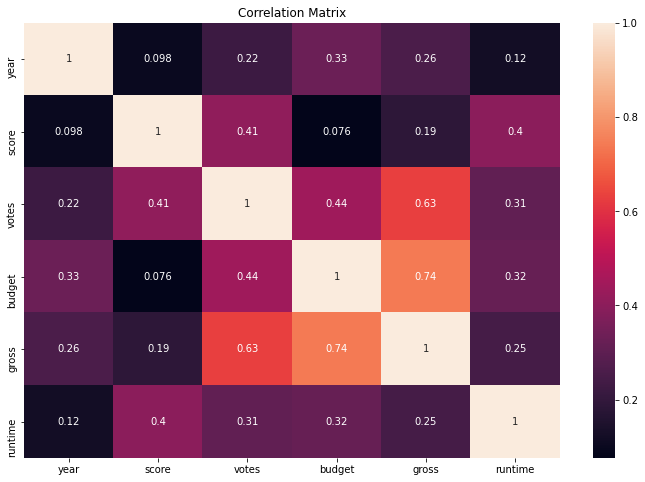

In [41]:
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix')


plt.show()

In [43]:
df_numerized = df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype=='object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name]= df_numerized[col_name].cat.codes
        
df_numerized.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,6587,6,6,1980,4,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,1
1,5573,6,1,1980,4,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,1
2,5142,4,0,1980,4,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,1
3,286,4,4,1980,4,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,1
4,1027,6,4,1980,4,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,1


In [52]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,1980 (United States),8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,1980 (United States),5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980 (United States),8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,1980 (United States),7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,1980 (United States),7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


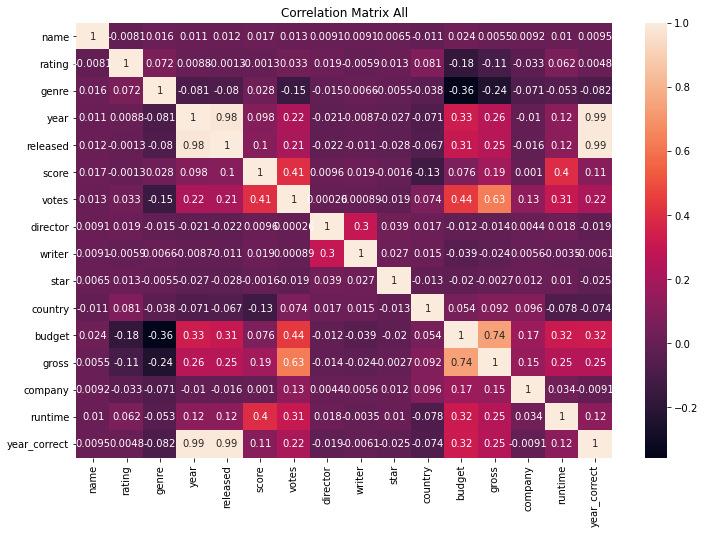

In [53]:
correlation_matrix_all = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix_all, annot=True)

plt.title('Correlation Matrix All')


plt.show()

In [54]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
name,1.000000,-0.008069,0.016355,0.011453,0.012347,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.023970,0.005533,0.009211,0.010392,0.009531
rating,-0.008069,1.000000,0.072423,0.008779,-0.001293,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.176002,-0.107339,-0.032943,0.062145,0.004814
genre,0.016355,0.072423,1.000000,-0.081261,-0.080102,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.356564,-0.235650,-0.071067,-0.052711,-0.082082
year,0.011453,0.008779,-0.081261,1.000000,0.980712,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.329321,0.257486,-0.010431,0.120811,0.992072
released,0.012347,-0.001293,-0.080102,0.980712,1.000000,0.100892,0.208810,-0.022077,-0.011296,-0.027721,-0.067292,0.309686,0.254176,-0.016283,0.119196,0.985056
score,0.017097,-0.001314,0.027965,0.097995,0.100892,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.076254,0.186258,0.001030,0.399451,0.105353
votes,0.013088,0.033225,-0.145307,0.222945,0.208810,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.442429,0.630757,0.133204,0.309212,0.219942
director,0.009079,0.019483,-0.015258,-0.020795,-0.022077,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.012272,-0.014441,0.004404,0.017624,-0.018618
writer,0.009081,-0.005921,0.006567,-0.008656,-0.011296,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.039451,-0.023519,0.005646,-0.003511,-0.006123
star,0.006472,0.013405,-0.005477,-0.027242,-0.027721,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019589,-0.002717,0.012442,0.010174,-0.025287


In [56]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name          name            1.000000
              rating         -0.008069
              genre           0.016355
              year            0.011453
              released        0.012347
              score           0.017097
              votes           0.013088
              director        0.009079
              writer          0.009081
              star            0.006472
              country        -0.010737
              budget          0.023970
              gross           0.005533
              company         0.009211
              runtime         0.010392
              year_correct    0.009531
rating        name           -0.008069
              rating          1.000000
              genre           0.072423
              year            0.008779
              released       -0.001293
              score          -0.001314
              votes           0.033225
              director        0.019483
              writer         -0.005921
              star       

In [57]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre         budget         -0.356564
budget        genre          -0.356564
gross         genre          -0.235650
genre         gross          -0.235650
budget        rating         -0.176002
rating        budget         -0.176002
votes         genre          -0.145307
genre         votes          -0.145307
score         country        -0.133348
country       score          -0.133348
rating        gross          -0.107339
gross         rating         -0.107339
genre         year_correct   -0.082082
year_correct  genre          -0.082082
genre         year           -0.081261
year          genre          -0.081261
genre         released       -0.080102
released      genre          -0.080102
runtime       country        -0.078412
country       runtime        -0.078412
              year_correct   -0.074085
year_correct  country        -0.074085
genre         company        -0.071067
company       genre          -0.071067
country       year           -0.070938
year          country    

In [59]:
high_positive_corr = sorted_pairs[(sorted_pairs)>0.5]

high_positive_corr 

gross         votes           0.630757
votes         gross           0.630757
gross         budget          0.740395
budget        gross           0.740395
year          released        0.980712
released      year            0.980712
year_correct  released        0.985056
released      year_correct    0.985056
year          year_correct    0.992072
year_correct  year            0.992072
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correc

In [62]:
high_negative_corr = sorted_pairs[(sorted_pairs)<-0.5]

high_negative_corr 

Series([], dtype: float64)

##### Conclusion: Votes and budget have highest correlation with gross earnings